<a href="https://colab.research.google.com/github/mechihallberg/2024UCALCD001/blob/main/SocialMediaConsumerBehavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [33]:
datos = pd.read_csv('datos.csv')

In [34]:
datos.head(15)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


In [35]:
datos.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


Corroboro que la etiqueta tenga nada más 0 y 1

In [ ]:
datos["Purchased"].unique()

<Axes: xlabel='Purchased', ylabel='count'>

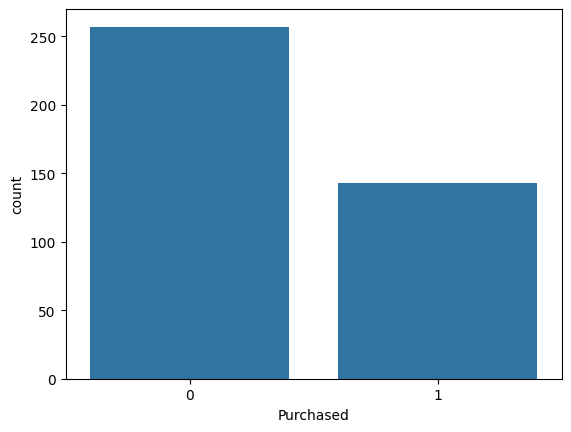

In [36]:
sb.countplot(x='Purchased', data=datos)

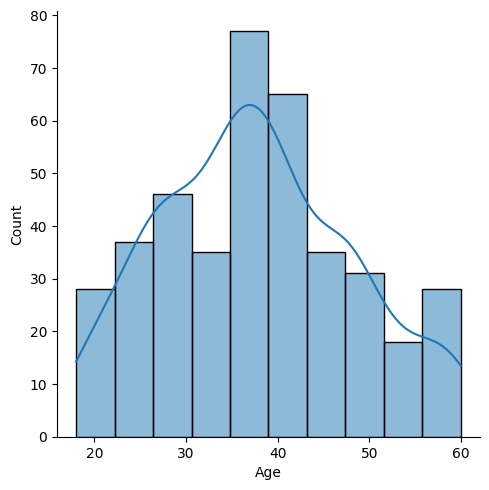

In [37]:
sb.displot(x='Age', data=datos, kde=True)

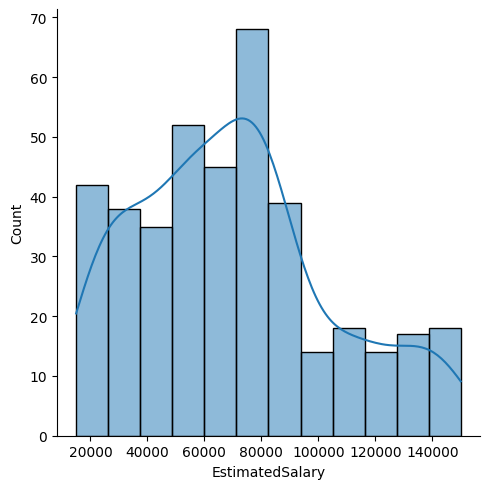

In [38]:
sb.displot(x='EstimatedSalary', data=datos, kde=True)

In [39]:
datos.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<Axes: >

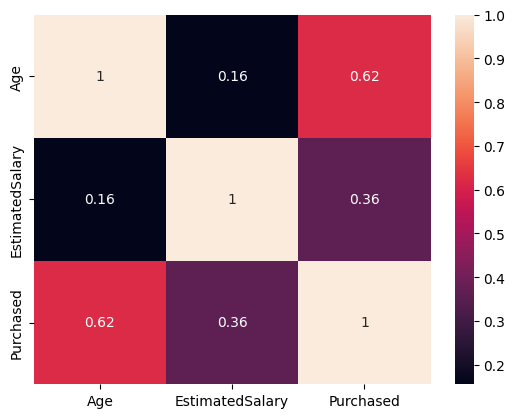

In [40]:
sb.heatmap(datos.corr(), annot=True)

In [41]:

X = datos.drop('Purchased', axis=1)
Y = datos['Purchased']

In [42]:
X_ent, X_pru, Y_ent, Y_pru = train_test_split(X, Y, test_size=0.2)

In [43]:
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_ent, Y_ent)

LogisticRegression(max_iter=1000)

In [44]:
predicciones = modelo.predict(X_pru)

In [45]:
accuracy_score(Y_pru, predicciones)

0.5875

In [47]:
from sklearn.metrics import classification_report
print(classification_report(Y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74        47
           1       0.00      0.00      0.00        33

    accuracy                           0.59        80
   macro avg       0.29      0.50      0.37        80
weighted avg       0.35      0.59      0.43        80



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
